## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pip install numerize

  Created wheel for numerize: filename=numerize-0.12-py3-none-any.whl size=3175 sha256=a1d3daae29b4b324dc6e12c36a315dd7317ffe4e77d82a1692333ba4786e0748
  Stored in directory: /root/.cache/pip/wheels/0d/ba/b3/eb42ce8e66387206bc3a9305a13b77af33b04ae6f7fde0bc14
Successfully built numerize


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from numerize import numerize

import seaborn as sns

In [102]:
#Upload the Play Store Data file and perform EDA on the data
play_store_data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project/Play Store Data.csv")

#Exploration of Data

In [103]:
#Top 5 rows of the data (a preview of data)
play_store_data_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [104]:
#Last 5 rows of the data 
play_store_data_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [105]:
#Number of column and number of rows 
play_store_data_df.shape

(10841, 13)

In [106]:
#Columns
column_name = play_store_data_df.columns

In [107]:
play_store_data_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [108]:
play_store_data_df[play_store_data_df['Price']=='0']['Price'].count()

10040

In [109]:
play_store_data_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [110]:
play_store_data_df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

#Definition of some features
* Reviews:- Number of reviews
* Type:- App is available 'Free' or 'Paid'.
* Size:- Size of App in MB.
* Price:- Price of App. Out of 10841 rows 10040 apps are free.
* Content Rating:- Related to age of user and availability of particular app to the age group. 
* Current Ver is version of App and Android Ver is version of android in which app will work.

In [111]:
#Information about each column/features
play_store_data_df.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Information about the data
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [113]:
#Number of null value in 'Rating' feature
play_store_data_df['Rating'].isnull().sum()

1474

# Handling NaN values

There are small number of NaN value in the columns 'Type', 'Content Rating', 'Current Ver', 'Android Ver'. We will drop rows containing 'NaN' corresponsding to these columns.

In [114]:
#Remove the rows that contain NaN for some features
play_store_data_df = play_store_data_df.dropna(subset =['Type', 'Content Rating', 'Current Ver', 'Android Ver'])

In [115]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Now consider value corresponding to column 'Rating', here we can not drop the rows directly because this column has sufficient large amount of NaN value.
We will fill the NaN value in rating column with the mean of the column.



In [116]:
#Fill the NaN value in rating column with mean of the column
mean = play_store_data_df['Rating'].mean()
play_store_data_df['Rating'].fillna(mean, inplace = True)

In [117]:
play_store_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Now our dataset have no NaN value.

In [118]:
play_store_data_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10829,10829,10829.000000,10829,10829,10829,10829,10829,10829,10829,10829,10829,10829
unique,9648,33,NaN,5999,457,20,2,92,6,119,1376,2831,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1968,NaN,594,1694,1578,10032,10032,8704,840,326,1458,2451
mean,NaN,NaN,4.191838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.479038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Compare the relationship between number of installs, number of reviews and corresponding rating.

In [119]:
#Here we remove those rows that have rating more than 5.0, because that is absurd.
new_play_df = play_store_data_df

In [120]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [121]:
new_play_df.shape

(10829, 13)

In [122]:
#Change the dtype of 'Reviews' column into int type
new_play_df["Reviews"] = new_play_df["Reviews"].astype(int)

Change the dtype of number of installs into int type. For eg. If 10,000+ is there than we change it into integer 10,000. Assuming that number of installs is 10K. 

In [123]:
install_data = new_play_df['Installs']

In [124]:
install_df = pd.DataFrame(install_data)

In [125]:
install_list = install_df['Installs'].tolist()

In [126]:
type(install_list[0])

str

In [127]:
#Add int value in the list
install_list_int = []
for s in install_list:

  str1 = s[:-1].replace(",", "")
  str2 = float(str1)
  install_list_int.append(str2)

In [128]:
#Add new column in dataframe
new_play_df['install_int'] = install_list_int

In [129]:
#We can see last column is integer value of installs
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


Create a bar graph

Text(0, 0.5, 'Average rating')

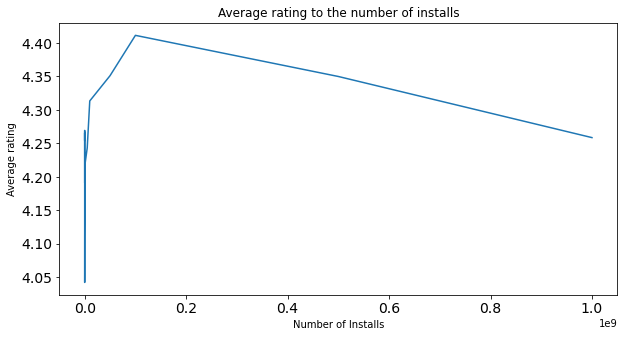

In [130]:
#Create a bar graph for "Average rating to the number of installs".
ax = new_play_df.groupby(["install_int"])["Rating"].mean().plot.line(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average rating to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average rating")

We can see number of install doesnot affects the rating average largerly. Here line shows considerable slope but the interval of Y-axis is very small compare to interval of X-axis.

In [131]:
column_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Consider rating low (< 3) which have more than 10K reviews and number of installs is more than 100k. 
We are trying to find the number of apps with such low rating and high installed number?

In [132]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['Installs'].value_counts()

1,000,000+    2
5,000,000+    1
Name: Installs, dtype: int64

In [133]:
new_play_df[(new_play_df['Rating']<3) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)]['App'].value_counts()

3D Holograms Joke      1
Club Penguin Island    1
PS4 Second Screen      1
Name: App, dtype: int64

##Conclusion1
There are total three such apps and they are mention above.
We can consider these three app as outliers or the apps that at the time of launch  very useful with time they become redundant ( not updated).

Now rating (> 4.5 ) with number of installs > 100k and number of reviews > 10k.
We group app by their Category.

In [134]:
#Rating is greater than 4.5
ash = new_play_df[(new_play_df['Rating']>4.5) & (new_play_df['install_int']>100_000) & (new_play_df['Reviews']>10000)].groupby(['Category', 'App'])


In [135]:
ash.first()

Rating  ...  install_int
Category          App                                                         ...             
ART_AND_DESIGN    Canva: Poster, banner, card maker & graphic design     4.7  ...   10000000.0
                  Colorfit - Drawing & Coloring                          4.7  ...     500000.0
                  U Launcher Lite – FREE Live Cool Themes, Hide Apps     4.7  ...    5000000.0
                  ibis Paint X                                           4.6  ...   10000000.0
AUTO_AND_VEHICLES AutoScout24 Switzerland – Find your new car            4.6  ...    1000000.0
...                                                                      ...  ...          ...
WEATHER           Fu*** Weather (Funny Weather)                          4.7  ...    1000000.0
                  Klara weather                                          4.6  ...     500000.0
                  Storm Radar: Tornado Tracker & Hurricane Alerts        4.6  ...    1000000.0
                  Weather forecast                                       4.8  ...    1000000.0
                  weather - weather forecast                             4.7  ...    1000000.0

[576 rows x 12 columns]

<!-- #From above observation we can say that there are small number of apps that are downloaded above 1 lacs has reviewed by more that 10% of user and has rating less than 3, i.e., if app is installed by more users than we can assume that the app production company is giving good services. -->
##Conclusion2
 We can study those apps production company method and functions that belong to the category in which we are going to make our app to get useful insights for the success of of our app. Eg. If we want "Auto_and_vehicle" category then we will study 'AutoScout24 Switzerland – Find your new car' app.

Create Bar plot

Text(0, 0.5, 'Average number of reviews')

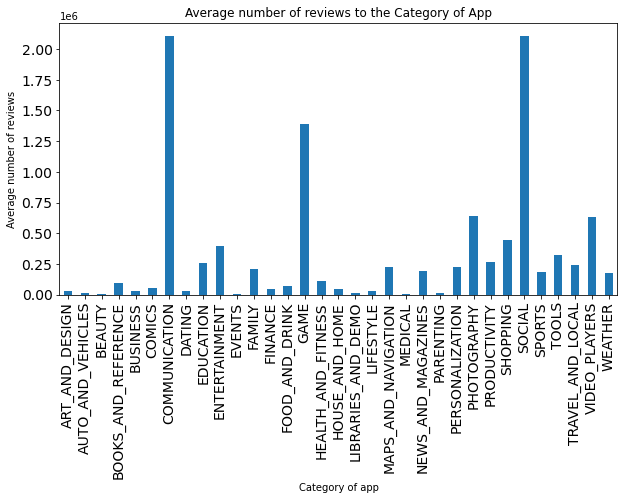

In [ ]:
#Create a bar graph between category and average number of review
ax = new_play_df.groupby(["Category"])["Reviews"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average number of reviews to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average number of reviews")

Text(0, 0.5, 'Average number of installs')

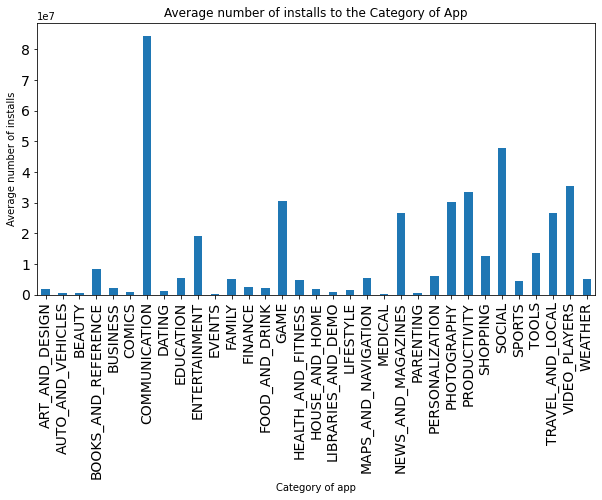

In [ ]:
#Create a bar graph between category and average number of installs
ax = new_play_df.groupby(["Category"])["install_int"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average number of installs to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average number of installs")

In [ ]:
new_play_df[new_play_df['Category']=="COMMUNICATION"]["App"]

335      Messenger – Text and Video Chat for Free
336                            WhatsApp Messenger
337                             Messenger for SMS
338                  Google Chrome: Fast & Secure
339         Messenger Lite: Free Calls & Messages
                           ...                   
10474                                Sat-Fi Voice
10479                          Free Wi-fi HotspoT
10720          Firefox Focus: The privacy browser
10739              FreedomPop Messaging Phone/SIM
10790                      HipChat - beta version
Name: App, Length: 328, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="GAME"]["App"]

1653                           ROBLOX
1654                   Subway Surfers
1655                 Candy Crush Saga
1656                        Solitaire
1657                   Bubble Shooter
                     ...             
10791               Winter Wonderland
10792          Soccer Clubs Logo Quiz
10793                       Sid Story
10803    Fatal Raid - No.1 Mobile FPS
10804                    Poker Pro.Fr
Name: App, Length: 1097, dtype: object

In [ ]:
new_play_df[new_play_df['Category']=="SOCIAL"]["App"]

2544                                        Facebook
2545                                       Instagram
2546                                   Facebook Lite
2547     Messages, Text and Video Chat for Messenger
2548                                          Tumblr
                            ...                     
10689                    Alarm.fo – choose your info
10714                  FunForMobile Ringtones & Chat
10765                Chat For Strangers - Video Chat
10799                                 Fr Daoud Lamei
10826      Frim: get new friends on local chat rooms
Name: App, Length: 259, dtype: object

Text(0, 0.5, 'Average Rating')

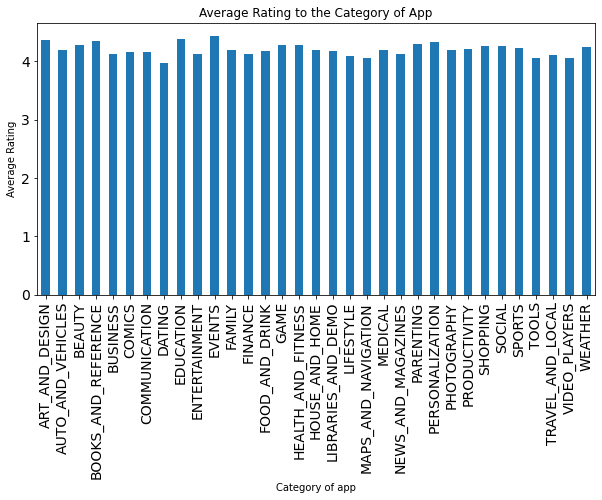

In [ ]:
#Create a bar graph
ax = new_play_df.groupby(["Category"])["Rating"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average Rating to the Category of App")

#X and Y axis labeling
ax.set_xlabel("Category of app")
ax.set_ylabel("Average Rating")

##Conclusion3
* We can see that from the above two bargraph Category : Comunication, Game, and Social have more average number of reviews and number of installs.   
* Communication has highest number of installs.
* Games category has more reviews but compartively less install. Means user of these cateorgy is actively reviewing the games app.
* Communication app like whatsapp, Messenger etc; Game app like Subway Surfers, Candy Crush, Solitaire etc and Social app like Facebook, Instagram, Tumblr etc.
* These three categories apps are good to produce but market is competitive. 
* Photography and Video players category are also have good number of reviews.
* In last(third) bar graph(category vs rating): Not much difference between the rating among different categories.

# Compare installs and size.
Is size affects the number of installs?

In [136]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int'],
      dtype='object')

In [137]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
 13  install_int     10829 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [138]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0


'Size' column is in string form we convert it into float. It also contain values "Varies with device" we will fill these values with mean of the column.

In [46]:
# Total number of 'Varies with device' in the 'Size column.
new_play_df[new_play_df['Size']=='Varies with device']['Size'].count()

1694

In [47]:
# Chnage into the list
size_lst = new_play_df['Size'].tolist()

In [49]:
# First put the 0M in place of 'Varies with device'.
for i in range(len(size_lst)):
  if size_lst[i]=='Varies with device':
    size_lst[i]='0M'


In [ ]:
size_lst

In [160]:
# Remove the last letter 'M' and 'k' from the size and convert kb into Mb
size_int_lst =[]
for s in size_lst:
  if s[-1]=='k':
    s1 = s[:-1]
    s2 =float(s1)
    s3 = s2/1024
    size_int_lst.append(s3)
  else:
    s1 = s[:-1]
    s2 = float(s1)
    size_int_lst.append(s2)

In [ ]:
size_int_lst

In [149]:
import statistics
mean = statistics.mean(size_int_lst)
mode = statistics.mode(size_int_lst)
# mean_size = sum(size_int_lst)/len(size_int_lst)
print(f'mean is {mean} and mode is {mode}')

mean is 18.165900022869724 and mode is 0.0


In [150]:
# Replace 0M size with mean of size
for i in range(len(size_int_lst)):
  if size_int_lst[i]==0:
    size_int_lst[i]=mean


In [152]:
#Add new column as size in int
new_play_df['size_in_num'] = size_int_lst

In [181]:
new_play_df['size_in_num'].mean()

21.007624525477393

##Outlier Analysis(Size)

Create the box plot for size of app

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


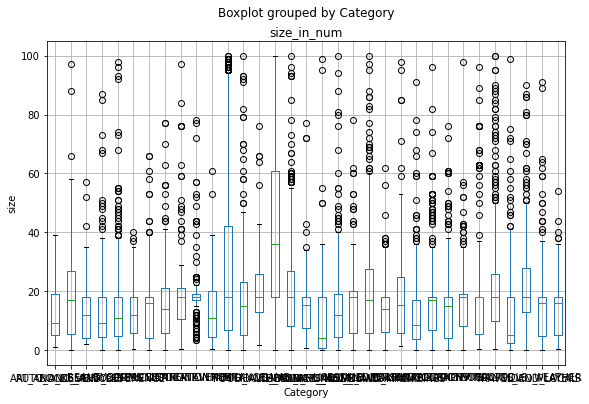

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


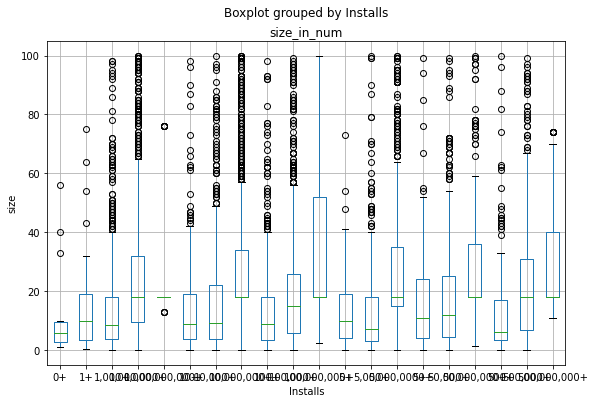

In [157]:
for col in ['Category', 'Installs']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'size_in_num', by = col, ax = ax)
  ax.set_ylabel("size")
  plt.show()

In [179]:
nav = new_play_df[(new_play_df['size_in_num']<1) & (new_play_df['install_int']>100_000)].groupby(['Category', 'Installs'])

In [180]:
nav.first()

App  ...  size_in_num
Category            Installs                                     ...             
BOOKS_AND_REFERENCE 1,000,000+                     Satellite AR  ...     0.090820
COMMUNICATION       1,000,000+                      Caller ID +  ...     0.115234
                    10,000,000+   Hangouts Dialer - Call Phones  ...     0.077148
FAMILY              1,000,000+                            EXO-L  ...     0.844727
LIBRARIES_AND_DEMO  1,000,000+                    Apk Installer  ...     0.285156
                    10,000,000+      Aviary Stickers: Free Pack  ...     0.609375
                    5,000,000+          Aviary Effects: Classic  ...     0.226562
LIFESTYLE           1,000,000+          Sleep as Android Unlock  ...     0.851562
                    500,000+     Moto LED for Moto X & E [Root]  ...     0.310547
PERSONALIZATION     10,000,000+    Galactic Core Free Wallpaper  ...     0.833008
                    500,000+                  OnePlus Icon Pack  ...     0.898438
PHOTOGRAPHY         500,000+                          easyFocus  ...     0.259766
PRODUCTIVITY        1,000,000+                   Simple Notepad  ...     0.696289
                    500,000+               CamScanner (License)  ...     0.048828
SHOPPING            1,000,000+                        Ouedkniss  ...     0.827148
TOOLS               1,000,000+           NETGEAR WiFi Analytics  ...     0.679688
                    10,000,000+             Screen Off and Lock  ...     0.512695
                    5,000,000+                   BTNotification  ...     0.364258
                    500,000+                  LG BT Reader Plus  ...     0.571289

[19 rows x 13 columns]

The above app has very specific use and its service mostly use to easy(eg.BTNotification, Screen Off and Lock) and some custom related(OnePles icon pack, Sleep as Andriod unlock). Most of apps are redundant.

Conclusion: we can drop these columns that have less than 1M size as well all apps having less than 100k install, means all apps having size less than 1M.

In [177]:
nav_ = new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']>100_000)].groupby(['Category', 'Installs'])

In [178]:
nav_.first()

App  ...  size_in_num
Category            Installs                                                        ...             
AUTO_AND_VEHICLES   1,000,000+                                Real Tractor Farming  ...         56.0
BEAUTY              1,000,000+   Sephora: Skin Care, Beauty Makeup & Fragrance ...  ...         57.0
                    500,000+                                  Beauty Selfie Camera  ...         52.0
BOOKS_AND_REFERENCE 1,000,000+                      Koran Read &MP3 30 Juz Offline  ...         67.0
                    500,000+                            English Persian Dictionary  ...         73.0
...                                                                            ...  ...          ...
TRAVEL_AND_LOCAL    500,000+                         World Travel Guide by Triposo  ...         81.0
VIDEO_PLAYERS       1,000,000+                                     OnePlus Gallery  ...         64.0
                    10,000,000+                                          AfreecaTV  ...         53.0
                    5,000,000+                                 Adobe Premiere Clip  ...         59.0
WEATHER             5,000,000+                                        METEO FRANCE  ...         54.0

[85 rows x 13 columns]

In [ ]:
#Number apps have size greater than 50M and install less than 100k.
new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']<100_000)].count()

These are the apps that have greater than 50M in size(mean size is 21M). This shows success(installs > 100k) of app with size greater than 50M.
Conclusion: We remove the apps which has size more than 50M and install 100k(there are total 214 such apps). Keep all those whose installs greater than 100k (size > 50M). 

---



In [184]:
# df.drop(df[df['Age'] < 25].index, inplace = True)
new_play_df.drop(new_play_df[(new_play_df['size_in_num']>50) & (new_play_df['install_int']<100_000)].index, inplace = True)

In [186]:
new_play_df.drop(new_play_df[new_play_df['size_in_num']<1].index, inplace = True)

In [187]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10303 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10303 non-null  object 
 1   Category        10303 non-null  object 
 2   Rating          10303 non-null  float64
 3   Reviews         10303 non-null  int64  
 4   Size            10303 non-null  object 
 5   Installs        10303 non-null  object 
 6   Type            10303 non-null  object 
 7   Price           10303 non-null  object 
 8   Content Rating  10303 non-null  object 
 9   Genres          10303 non-null  object 
 10  Last Updated    10303 non-null  object 
 11  Current Ver     10303 non-null  object 
 12  Android Ver     10303 non-null  object 
 13  install_int     10303 non-null  float64
 14  size_in_num     10303 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


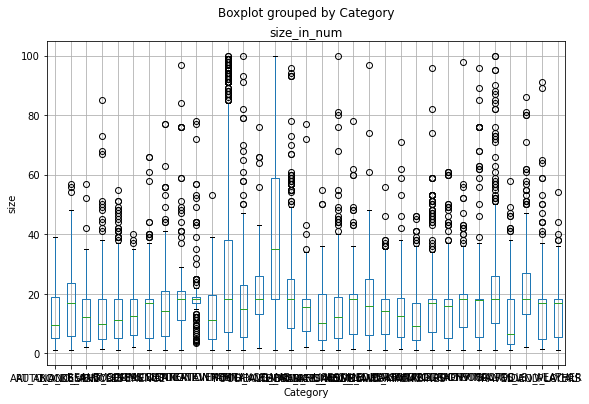

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


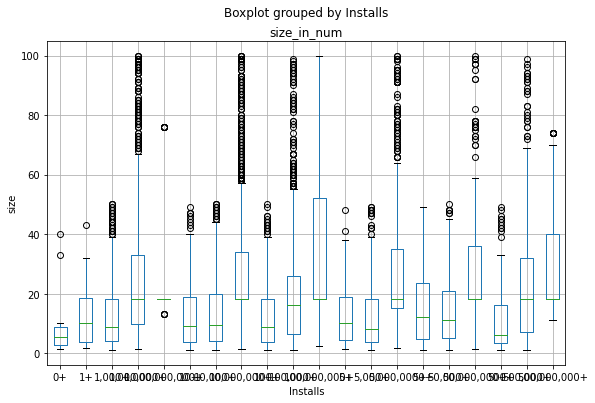

In [188]:
for col in ['Category', 'Installs']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'size_in_num', by = col, ax = ax)
  ax.set_ylabel("size")
  plt.show()

Text(0, 0.5, 'Average size')

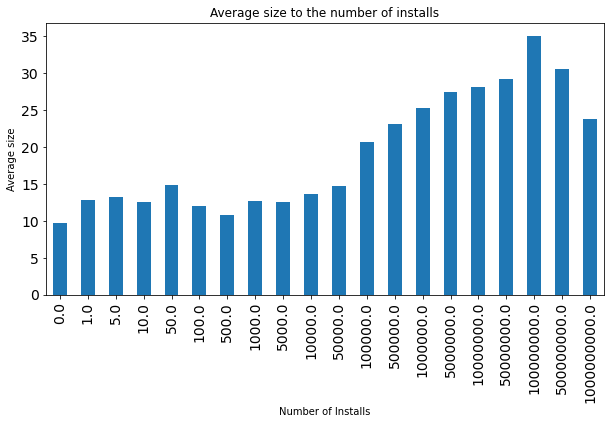

In [191]:
#Create a bar graph for "Average size to the number of installs".
ax = new_play_df.groupby(["install_int"])["size_in_num"].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)

#Title
ax.set_title("Average size to the number of installs")

#X and Y axis labeling
ax.set_xlabel("Number of Installs")
ax.set_ylabel("Average size")

As the number of install increases average size of app is also increases. Last two bar are less because very high number of installs pushing the app developers to make the app more and more good(in every update they are trying to lower the size). 

**Conclusion:** For our app if size is around and above the average size than also it will be considerable, i.e., If we add some features(that take some memory) in our app that are not very important but helpful to user, then we must go for it. 

##Conclusion
* We will go with these many outliers, because:

  * We have removed apps size that are size less than 1M that are mostly for specific uses.
  * We have removed all those apps have >50M and installs < 100k. Assumong that success of app is for installs > 100k. We can change success definition as per need.
*Therefore, all other outliers in the box plot contain some information. We go with this updated dataset.


#Distribution plot.

##Rating

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


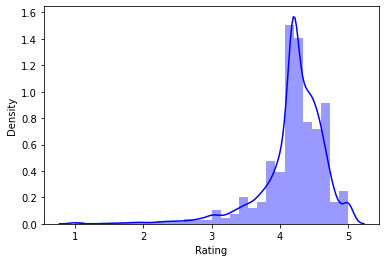

In [ ]:
res = sns.distplot(new_play_df['Rating'] ,color = 'blue', bins=30)
plt.show()

In [ ]:
new_play_df[new_play_df['Rating']>4.0]['App'].count()

6800

In [ ]:
6800/10842*100

62.71905552481092

We can see that distribution plot of rating is right skewed normal distribution with mean around 4.5. Out 10,841 different entries, 6800 has rating more than 4.0 rating, i.e., more than 62.7 % of app have this rating.

In [ ]:
new_play_df.info()

##Size of app

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


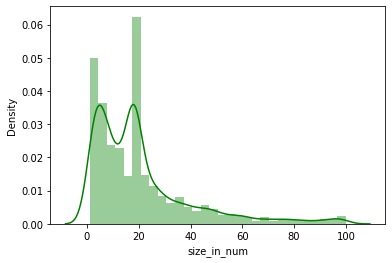

In [193]:
res = sns.distplot(new_play_df['size_in_num'] ,color = 'g', bins=30)
plt.show()

In [210]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,2.8


In [211]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10303 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10303 non-null  object 
 1   Category        10303 non-null  object 
 2   Rating          10303 non-null  float64
 3   Reviews         10303 non-null  int64  
 4   Size            10303 non-null  object 
 5   Installs        10303 non-null  object 
 6   Type            10303 non-null  object 
 7   Price           10303 non-null  object 
 8   Content Rating  10303 non-null  object 
 9   Genres          10303 non-null  object 
 10  Last Updated    10303 non-null  object 
 11  Current Ver     10303 non-null  object 
 12  Android Ver     10303 non-null  object 
 13  install_int     10303 non-null  float64
 14  size_in_num     10303 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.3+ MB


In [ ]:
column_name

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


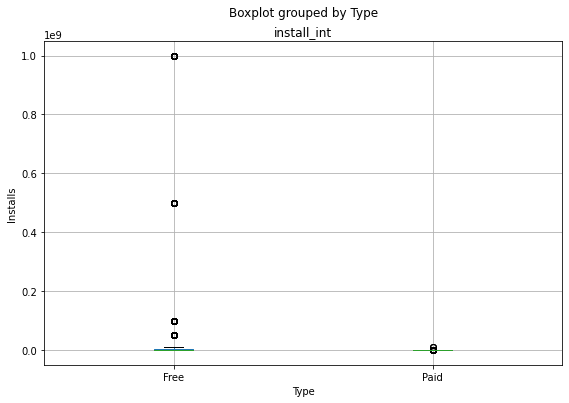

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


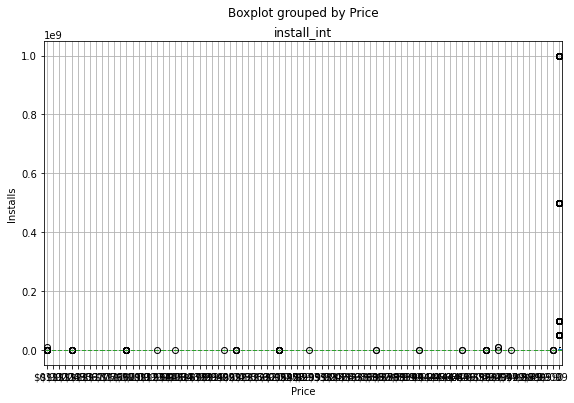

In [209]:
for col in ['Type', 'Price']:
  fig = plt.figure(figsize=(9, 6))
  ax = fig.gca()
  new_play_df.boxplot(column = 'install_int', by = col, ax = ax)
  ax.set_ylabel("Installs")
  plt.show()



In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

In [ ]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Number of installs,  Content Rating and genres.
We draw the pie chart and calculate the percent of app belonging to different content rating of app.

In [221]:
#using groupby count the number of app to correspondind content rating
data = new_play_df.groupby(['Content Rating'])["Content Rating"].count()

In [222]:
data

Content Rating
Adults only 18+       3
Everyone           8233
Everyone 10+        408
Mature 17+          490
Teen               1167
Unrated               2
Name: Content Rating, dtype: int64

In [223]:
#Create DataFrame
data_ = pd.DataFrame(data)

In [224]:
data_

,Content Rating
Content Rating,
Adults only 18+,3
Everyone,8233
Everyone 10+,408
Mature 17+,490
Teen,1167
Unrated,2


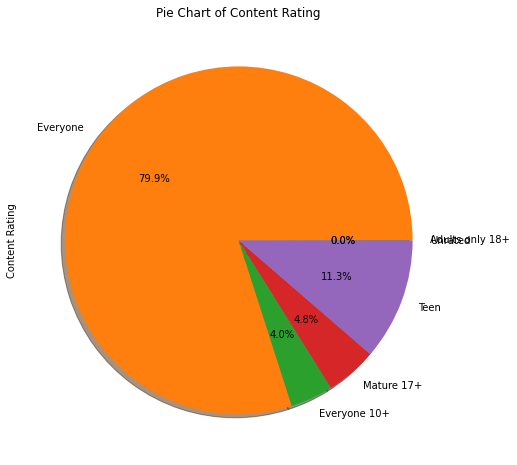

In [282]:
#Create a pie chart
plot = data_.plot.pie(y='Content Rating', title="Pie Chart of Content Rating", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize = (8,8))


##Conclusion
Most of the apps belong to "Everyone" content rating. Very few app belong to 'Adult only 18+' and 'Unrate'(overlaped each other). "Teen" rating also contains good amount of apps.

Draw a pie chat for the number of apps that are installed by more than 10k users. 

In [230]:
#Collect data
installs_data =new_play_df[new_play_df['install_int']>100_000].groupby(["Installs"])["Installs"].count()

In [231]:
#Create Data frame
installs_df = pd.DataFrame(installs_data)

In [232]:
installs_df

,Installs
Installs,
"1,000,000+",1559
"1,000,000,000+",58
"10,000,000+",1244
"100,000,000+",409
"5,000,000+",748
"50,000,000+",289
"500,000+",530
"500,000,000+",72


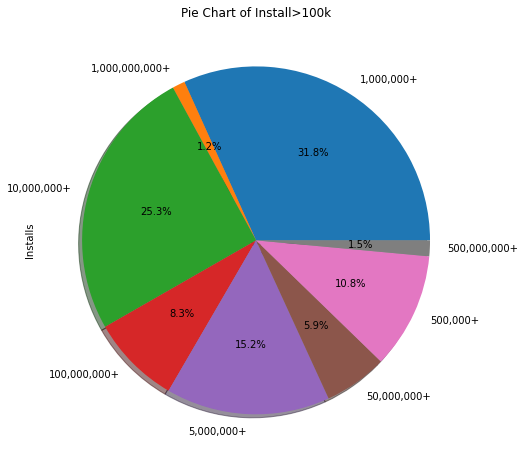

In [238]:
plot = installs_df.plot.pie(y='Installs', title="Pie Chart of Install>100k", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0, figsize = (8,8))


In [239]:
31.8+25.3

57.1

In [291]:
#Number of app available to Everyone and Teen
# Number of app available not to Everyone
new_play_df[(new_play_df['Content Rating']=='Everyone') | (new_play_df['Content Rating']=='Teen')]['Category'].count()

9400

In [292]:
# Number of app available not to Everyone and Teen
new_play_df[(new_play_df['Content Rating']!='Everyone') & (new_play_df['Content Rating']!='Teen')]['Category'].count()

903

In [274]:
new_play_df[(new_play_df['Content Rating']=='Mature 17+')]['Category'].count()

490

In [280]:
new_play_df[(new_play_df['Content Rating']=='Mature 17+') & (new_play_df['Type']!='Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num
476,"Moco+ - Chat, Meet People",DATING,4.200000,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000.0,18.1659
481,AMBW Dating App: Asian Men Black Women Interra...,DATING,3.500000,2,17M,100+,Paid,$7.99,Mature 17+,Dating,"January 21, 2017",1.0.1,4.0 and up,100.0,17.0000
571,"Moco+ - Chat, Meet People",DATING,4.200000,1546,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,10000.0,18.1659
1001,Meme Generator,ENTERTAINMENT,4.600000,3771,53M,"100,000+",Paid,$2.99,Mature 17+,Entertainment,"August 3, 2018",4.426,4.1 and up,100000.0,53.0000
2252,Essential Anatomy 3,MEDICAL,4.100000,1533,42M,"50,000+",Paid,$11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up,50000.0,42.0000
2386,Essential Anatomy 3,MEDICAL,4.100000,1533,42M,"50,000+",Paid,$11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up,50000.0,42.0000
4034,Hitman Sniper,GAME,4.600000,408292,29M,"10,000,000+",Paid,$0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,10000000.0,29.0000
4190,H*nest Meditation,LIFESTYLE,4.900000,145,48M,"5,000+",Paid,$1.99,Mature 17+,Lifestyle,"April 7, 2016",1.0,4.0.3 and up,5000.0,48.0000
4316,Anna.K Tarot,FAMILY,4.800000,17,23M,100+,Paid,$3.99,Mature 17+,Entertainment,"January 16, 2017",1.4.4,4.0.3 and up,100.0,23.0000
4491,"Q Alerts: QAnon Drop Notifications, Research +++",NEWS_AND_MAGAZINES,4.700000,143,26M,"5,000+",Paid,$0.99,Mature 17+,News & Magazines,"July 26, 2018",4.1.10,4.1 and up,5000.0,26.0000


Consider that 'Teen' is also available for everyone. Then, app that are not available for 'Everyone'( total =930), ~50%(490) of them comes under the 'Mature 17+' in the Category 'Dating' and 'Games'(majority).

##Conclusion
* From the above two pie chart we can conclude that most of the apps are available for "Everyone". 57.1% apps are downloaded by more than 1M users.
* Mostly genres 'dating' and 'games' not come under "Everyone".

#Last updated

In [293]:
new_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'install_int', 'size_in_num'],
      dtype='object')

In [301]:
new_play_df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0,2018-01-07


In [300]:
#Convert the dates in last updated column into datetime type
import datetime

# df['Dates'] = pd. to_datetime(df['Dates'], format='%y%m%d')
new_play_df['Last Updated_datetime'] = pd.to_datetime(new_play_df['Last Updated'])

In [299]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10303 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    10303 non-null  object        
 1   Category               10303 non-null  object        
 2   Rating                 10303 non-null  float64       
 3   Reviews                10303 non-null  int64         
 4   Size                   10303 non-null  object        
 5   Installs               10303 non-null  object        
 6   Type                   10303 non-null  object        
 7   Price                  10303 non-null  object        
 8   Content Rating         10303 non-null  object        
 9   Genres                 10303 non-null  object        
 10  Last Updated           10303 non-null  object        
 11  Current Ver            10303 non-null  object        
 12  Android Ver            10303 non-null  object        
 13  i

In [312]:
# Number of app updated before August 01, 2016
new_play_df[new_play_df['Last Updated_datetime']< '2016-08-01']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime
144,Cool Reader,BOOKS_AND_REFERENCE,4.500000,246315,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,"July 17, 2015",Varies with device,1.5 and up,10000000.0,18.1659,2015-07-17
170,Flybook,BOOKS_AND_REFERENCE,3.900000,1778,4.9M,"500,000+",Free,0,Mature 17+,Books & Reference,"October 16, 2014",1.0.3,2.1 and up,500000.0,4.9000,2014-10-16
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,4.191838,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up,100000.0,7.3000,2015-08-07
200,SuperLivePro,BUSINESS,4.300000,46353,21M,"1,000,000+",Free,0,Everyone,Business,"April 13, 2016",2.8,1.5 and up,1000000.0,21.0000,2016-04-13
424,DU Browser—Browse fast & fun,COMMUNICATION,4.300000,1133501,4.7M,"10,000,000+",Free,0,Everyone,Communication,"April 1, 2016",6.4.0.4,4.0 and up,10000000.0,4.7000,2016-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10817,HTC Sense Input - FR,TOOLS,4.000000,885,8.0M,"100,000+",Free,0,Everyone,Tools,"October 30, 2015",1.0.612928,5.0 and up,100000.0,8.0000,2015-10-30
10818,Gold Quote - Gold.fr,FINANCE,4.191838,96,1.5M,"10,000+",Free,0,Everyone,Finance,"May 19, 2016",2.3,2.2 and up,10000.0,1.5000,2016-05-19
10829,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.600000,603,7.4M,"10,000+",Free,0,Everyone,Books & Reference,"June 19, 2016",2.96,4.1 and up,10000.0,7.4000,2016-06-19
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.800000,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up,100000.0,2.3000,2014-01-20


Latest date that is recorded in the dataset is August 1, 2018. 


## Conclusion
Consider the app redundant that are not updated since 2 years, i.e., last updated was on August 1, 2016 or before.



In [313]:
new_play_df.drop(new_play_df[new_play_df['Last Updated_datetime']< '2016-08-01'].index, inplace = True)

In [314]:
new_play_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9289 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    9289 non-null   object        
 1   Category               9289 non-null   object        
 2   Rating                 9289 non-null   float64       
 3   Reviews                9289 non-null   int64         
 4   Size                   9289 non-null   object        
 5   Installs               9289 non-null   object        
 6   Type                   9289 non-null   object        
 7   Price                  9289 non-null   object        
 8   Content Rating         9289 non-null   object        
 9   Genres                 9289 non-null   object        
 10  Last Updated           9289 non-null   object        
 11  Current Ver            9289 non-null   object        
 12  Android Ver            9289 non-null   object        
 13  in

#Andriod Version

In [318]:
new_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000.0,19.0,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000.0,14.0,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000.0,8.7,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000.0,25.0,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000.0,2.8,2018-06-20


In [319]:
and_ver = new_play_df['Android Ver'].tolist()

In [ ]:
and_ver

In [322]:
# Andriod Ver: Consider only the main version type not the subtype( eg. for 4.0.3 consider version as 4) and replace 'Varies with device' with version 4.
and_ver_first_letter_lst = []
for s in and_ver:
  if s == 'Varies with device':
    s=4
    and_ver_first_letter_lst.append(s)
  else:
    s1 = s[0]
    s2 = int(s1)
    and_ver_first_letter_lst.append(s2)

In [ ]:
and_ver_first_letter_lst

In [324]:
new_play_df["android Ver_int"] = and_ver_first_letter_lst

In [330]:
new_play_df[(new_play_df["android Ver_int"]<=1) & (new_play_df['Last Updated_datetime']>"2018-01-01")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_int,size_in_num,Last Updated_datetime,android Ver_int
722,English speaking texts,EDUCATION,4.400000,1619,3.0M,"1,000,000+",Free,0,Everyone,Education,"July 20, 2018",1.2,1.6 and up,1000000.0,3.0,2018-07-20,1
1547,Eternal life,LIBRARIES_AND_DEMO,5.000000,26,2.5M,"1,000+",Free,0,Everyone,Libraries & Demo,"May 24, 2018",1.0,1.6 and up,1000.0,2.5,2018-05-24,1
4411,Age of Conquest: N. America,FAMILY,4.500000,659,3.3M,"10,000+",Paid,$3.99,Everyone,Strategy,"August 4, 2018",1.0.28,1.5 and up,10000.0,3.3,2018-08-04,1
7993,2 Amateur ham radio CW Morse code practice key...,COMMUNICATION,4.800000,6,3.5M,100+,Paid,$1.49,Everyone,Communication,"March 5, 2018",1.0.9,1.6 and up,100.0,3.5,2018-03-05,1
8098,Igitabo cy'Indirimbo,FAMILY,4.500000,93,1.6M,"50,000+",Free,0,Everyone,Entertainment,"February 5, 2018",INDIRIMBO V.2014.002,1.6 and up,50000.0,1.6,2018-02-05,1
8919,Bible du Semeur-BDS (French),BOOKS_AND_REFERENCE,4.500000,313,6.9M,"50,000+",Free,0,Everyone,Books & Reference,"August 4, 2018",0.7,1.0 and up,50000.0,6.9,2018-08-04,1
8928,Proverbes du monde,FAMILY,4.191838,38,2.8M,"10,000+",Free,0,Everyone,Entertainment,"March 12, 2018",1.1.2.0,1.6 and up,10000.0,2.8,2018-03-12,1
9490,WiFi Tether Router,COMMUNICATION,4.200000,5599,1.3M,"100,000+",Paid,$2.90,Everyone,Communication,"July 2, 2018",6.2.7,1.6 and up,100000.0,1.3,2018-07-02,1
9571,The Holy Rosary,LIFESTYLE,4.700000,56197,15M,"1,000,000+",Free,0,Everyone,Lifestyle,"August 6, 2018",1.6.17,1.6 and up,1000000.0,15.0,2018-08-06,1
10459,SCI-FI UI,FAMILY,4.700000,15,3.9M,100+,Paid,$1.99,Everyone,Entertainment,"April 16, 2018",0.0.53,1.6 and up,100.0,3.9,2018-04-16,1


There are 10 apps that support android ver 1 and are updated also( Great).

In [331]:
new_play_df['android Ver_int'].value_counts()

4    7674
2     733
5     589
3     166
6      55
7      38
1      29
8       5
Name: android Ver_int, dtype: int64